# Linear regression: Housing Price Prediction

This notebook uses the classic [Boston Housing](http://lib.stat.cmu.edu/datasets/boston) Dataset and builds a model to predict the housing price in the suburban area of Boston.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf

from tensorflow import keras #cleaner and shorter weight
from tensorflow.keras import layers #e.g. hidden/ output...
from tensorflow.keras.datasets import boston_housing #data
import time

## The Boston Housing Dataset

The Boston dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. The dataset is small in size with only 506 cases. A full description of all variables can be found [here](http://lib.stat.cmu.edu/datasets/boston).

### Get the data
First download the dataset. Boston dataset is a build-in dataset in Keras. Notice that this build-in dataset has already been cleaned and preprocessed (normalized) by keras.

In [3]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

#dataset, which is already separated in train and test data.
#The only parameter (path) is basically where to store the downloaded dataset.

In [17]:
#check training and test size
print('Training data : {}'.format(train_data.shape))
print('Training target : {}'.format(train_targets.shape))
print('Test data : {}'.format(test_data.shape))
print('Test target : {}'.format(test_targets.shape))

#so can know the regression model: y = g(β0 + β1x1 + ......+ β13x13) : 13 inputs  --> 找β > 1 output

Training data : (404, 13)
Training target : (404,)
Test data : (102, 13)
Test target : (102,)


## The model

### Build the model

Let's build our model. Here, we'll use a `Sequential` model with an output layer that returns a single, continuous value. The model building steps are wrapped in a function, `build_model`, since we'll create a second model, later on.

In [5]:
# methoud1: directly
# Adam
model = keras.Sequential([layers.Dense(1, input_shape=[train_data.shape[1]])])
#dense: fully connected, CNN就不是dense
#1是因為output只有1個
optimizer = tf.keras.optimizers.Adam(0.001)
#use Adam optimizer here, 0.001 is learning_rate, is default value
#https://keras.io/api/optimizers/adam/
model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mse'])
#loss function: tell it is regression problem by MSE, metrics is model evaluation performance

In [6]:
#SGD
model_1 = keras.Sequential([layers.Dense(1, input_shape=[train_data.shape[1]])])

optimizer = tf.keras.optimizers.SGD(0.0000004)

model_1.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mse'])

### Build the model

We can also wrap the model in a function, `build_model`, if we want to create a second model, later on.

In [6]:
# methoud2: writing function for future use
# Adam
def build_model():
    model = keras.Sequential([layers.Dense(1, input_shape=[train_data.shape[1]])])
    optimizer = tf.keras.optimizers.Adam(0.001)
    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mse'])
    return model

### Inspect the model

Use the `.summary` method to print a simple description of the model

In [7]:
model.summary()
#1 output layer
#number of parameters: 13 + 1(bias)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 14        
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


In [8]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 14        
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


### Train the model

Train the model for 2000 epochs, and record the training accuracy in the `history` object.

In [9]:
# Display training progress by printing a single dot for each completed epoch
# Adam
class PrintLoss(keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs):
        if epoch == 0: self.time = time.monotonic()
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0:
            # calculate training time
            t = time.monotonic() - self.time
            # if validation set is included, its loss is recorded in logs['val_loss']
            print('| Epoch {:4} | training time {:6.2f}s | train loss {:6.2f} |'
                  .format(epoch, t, logs['loss']))
EPOCHS = 3001 #k
#only with 2900, so we set = 3001
#e.g. sample size = n, total: k*n iterations
#try and see when will converge

history = model.fit(train_data, train_targets,
                    epochs=EPOCHS, verbose=0,
                    callbacks=[PrintLoss()])
#if batch_size=500，就不會converge (train loss) / if = 404 --> full data set
#SGD is very sensitive (when chooseing different stepsize)

| Epoch    0 | training time   0.25s | train loss 82370.20 |
| Epoch  100 | training time   0.77s | train loss 421.18 |
| Epoch  200 | training time   1.30s | train loss 215.63 |
| Epoch  300 | training time   1.81s | train loss 118.19 |
| Epoch  400 | training time   2.31s | train loss  63.94 |
| Epoch  500 | training time   2.83s | train loss  47.59 |
| Epoch  600 | training time   3.34s | train loss  42.12 |
| Epoch  700 | training time   3.86s | train loss  38.16 |
| Epoch  800 | training time   4.38s | train loss  35.13 |
| Epoch  900 | training time   4.89s | train loss  33.12 |
| Epoch 1000 | training time   5.39s | train loss  31.52 |
| Epoch 1100 | training time   5.92s | train loss  30.79 |
| Epoch 1200 | training time   6.47s | train loss  28.74 |
| Epoch 1300 | training time   6.97s | train loss  27.92 |
| Epoch 1400 | training time   7.53s | train loss  27.26 |
| Epoch 1500 | training time   8.05s | train loss  27.05 |
| Epoch 1600 | training time   8.56s | train loss  26.

In [10]:
# SDK
class PrintLoss(keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs):
        if epoch == 0: self.time = time.monotonic()
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0:
            t = time.monotonic() - self.time
            print('| Epoch {:4} | training time {:6.2f}s | train loss {:6.2f} |'
                  .format(epoch, t, logs['loss']))
EPOCHS = 3001 #k

history_1 = model_1.fit(train_data, train_targets,
                    epochs=EPOCHS, verbose=0,
                    callbacks=[PrintLoss()])

#SGD is very sensitive (when chooseing different stepsize)

| Epoch    0 | training time   0.14s | train loss 736.47 |
| Epoch  100 | training time   0.62s | train loss 121.72 |
| Epoch  200 | training time   1.09s | train loss 104.88 |
| Epoch  300 | training time   1.58s | train loss  94.91 |
| Epoch  400 | training time   2.05s | train loss  88.86 |
| Epoch  500 | training time   2.59s | train loss  84.54 |
| Epoch  600 | training time   3.12s | train loss  81.12 |
| Epoch  700 | training time   3.62s | train loss  78.16 |
| Epoch  800 | training time   4.09s | train loss  75.74 |
| Epoch  900 | training time   4.55s | train loss  74.03 |
| Epoch 1000 | training time   5.02s | train loss  72.21 |
| Epoch 1100 | training time   5.48s | train loss  70.41 |
| Epoch 1200 | training time   5.95s | train loss  68.22 |
| Epoch 1300 | training time   6.41s | train loss  66.92 |
| Epoch 1400 | training time   6.88s | train loss  66.24 |
| Epoch 1500 | training time   7.36s | train loss  64.14 |
| Epoch 1600 | training time   7.88s | train loss  63.90

Visualize the model's training progress using the stats stored in the `history` object.

In [12]:
#turn into dataframe
hist = pd.DataFrame(history.history)
#new add column
hist['epoch'] = history.epoch
display(hist.tail())

#SDK
hist_1 = pd.DataFrame(history_1.history)
#new add column
hist_1['epoch'] = history_1.epoch
display(hist_1.tail())

,loss,mse,epoch
2996,25.096163,25.096163,2996
2997,24.652615,24.652615,2997
2998,24.694767,24.694767,2998
2999,24.671721,24.671721,2999
3000,24.937281,24.937281,3000


,loss,mse,epoch
2996,54.192585,54.192585,2996
2997,54.546272,54.546272,2997
2998,54.100693,54.100693,2998
2999,54.215240,54.215240,2999
3000,54.336792,54.336792,3000


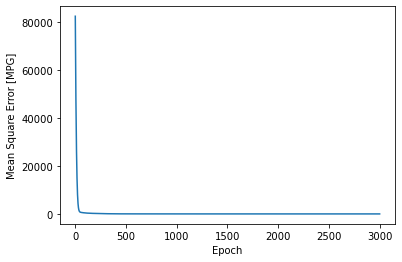

In [14]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    hist.tail()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [MPG]')
    plt.plot(hist['epoch'], hist['mse'],
             label='Train Error')

    plt.show()
#Adam
plot_history(history)

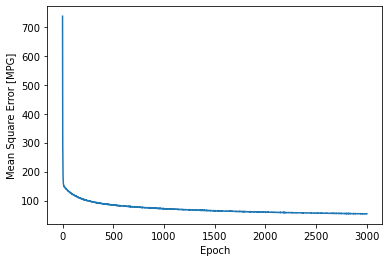

In [15]:
#SDK
plot_history(history_1)

### Make predictions

Calculate testing test mean squared error

In [22]:
_, mse = model.evaluate(test_data, test_targets, verbose=0)

print("Adam: Testing set Mean Squared Error: {:5.2f}".format(mse))

#evaluate 印出的值是loss, accuracy(metric)
#"_"代表最後一次執行的結果，或暫時性/不重要的變數
#verbose = 0 代表不要輸出任何紀錄訊息
#verbose = 1 表不輸出進度條紀錄，是default，
#會出現4/4 [==============================] - 0s 972us/step - loss: 24.4064 - mse: 24.4064

_, mse_1 = model_1.evaluate(test_data, test_targets, verbose=0)

print("SDK: Testing set Mean Squared Error: {:5.2f}".format(mse_1))


Adam: Testing set Mean Squared Error: 24.41
SDK: Testing set Mean Squared Error: 63.09


Finally, predict housing price using data in the testing set:

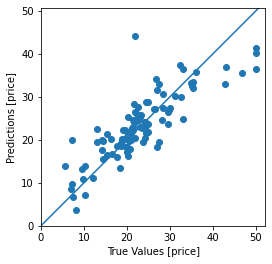

In [24]:
test_predictions = model.predict(test_data).flatten()

plt.scatter(test_targets, test_predictions)
plt.xlabel('True Values [price]')
plt.ylabel('Predictions [price]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100]) #diagonal line

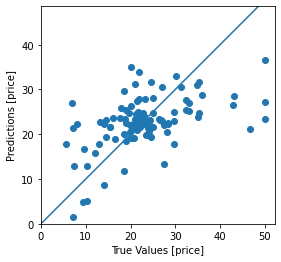

In [23]:
test_predictions_1 = model_1.predict(test_data).flatten()

plt.scatter(test_targets, test_predictions_1)
plt.xlabel('True Values [price]')
plt.ylabel('Predictions [price]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100]) #diagonal line